Stock Market Price Prediction Model 
1. Collection of Data 
2. Pre-processing of the Data 
3. Creating a stacked LSTM Architecture 
4. Predict the test dta and plot the output 
5. Predict the future 30 days and plot the output  



In [18]:
import pandas_datareader as pdr 
import pandas as pd 

In [19]:
data=pdr.get_data_tiingo('AAPL',api_key='652fbe263ba5d329f1b3bec1458bcda77712bb57')
data.to_csv('AAPL.csv')
data=pd.read_csv('AAPL.csv')
data.head()


c:\Users\prani\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


symbol                       date   close    high     low    open    volume  \
0   AAPL  2019-07-08 00:00:00+00:00  200.02  201.40  198.41  200.81  25338628   
1   AAPL  2019-07-09 00:00:00+00:00  201.24  201.51  198.81  199.20  20578015   
2   AAPL  2019-07-10 00:00:00+00:00  203.23  203.73  201.56  201.85  17897138   
3   AAPL  2019-07-11 00:00:00+00:00  201.75  204.39  201.71  203.31  20191842   
4   AAPL  2019-07-12 00:00:00+00:00  203.30  204.00  202.20  202.45  17595212   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  48.260326  48.593289  47.871869  48.450935  101354512      0.0          1.0  
1  48.554685  48.619830  47.968380  48.062479   82312060      0.0          1.0  
2  49.034827  49.155466  48.631894  48.701864   71588552      0.0          1.0  
3  48.677736  49.314709  48.668085  49.054129   80767368      0.0          1.0  
4  49.051716  49.220611  48.786311  48.846631   70380848      0.0          1.0

In [20]:
data=data['close']
data.head()

0    200.02
1    201.24
2    203.23
3    201.75
4    203.30
Name: close, dtype: float64

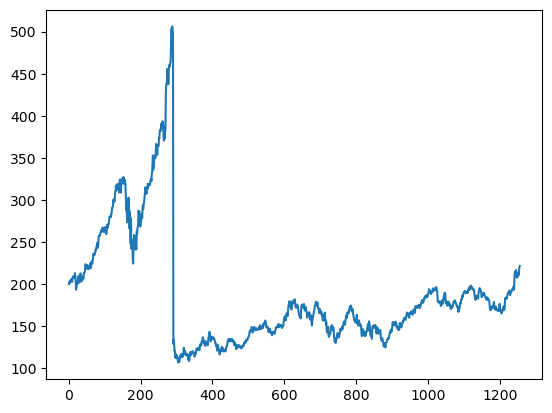

In [21]:
import matplotlib.pyplot as plt 
plt.plot(data)

In [26]:
#LSTM are sensitive to the scale of the data . So, we will normalize/scale the data using minmax scaler or normalizer.
import numpy as np
data=np.array(data).reshape(-1,1)
min=np.min(data)
max=np.max(data)
data=(data-min)/(max-min)
data


array([[0.2333876 ],
       [0.23644333],
       [0.24142768],
       ...,
       [0.27529117],
       [0.2841077 ],
       [0.28731371]])

In [29]:
train_size=int(len(data)*0.65)
test_size=len(data)-train_size
train_data,test_data=data[0:train_size,:],data[train_size:,:] 


array([[2.33387602e-01],
       [2.36443331e-01],
       [2.41427677e-01],
       [2.37720726e-01],
       [2.41603006e-01],
       [2.46386976e-01],
       [2.44608641e-01],
       [2.41728240e-01],
       [2.47514089e-01],
       [2.39824671e-01],
       [2.51421415e-01],
       [2.55479023e-01],
       [2.55053225e-01],
       [2.50920476e-01],
       [2.52723857e-01],
       [2.57582968e-01],
       [2.55328741e-01],
       [2.65998748e-01],
       [2.54452098e-01],
       [2.43406387e-01],
       [2.16656230e-01],
       [2.25823419e-01],
       [2.30932999e-01],
       [2.41928616e-01],
       [2.35817157e-01],
       [2.34539762e-01],
       [2.55804634e-01],
       [2.40225423e-01],
       [2.37695679e-01],
       [2.49618034e-01],
       [2.59261115e-01],
       [2.59286162e-01],
       [2.64996869e-01],
       [2.64546024e-01],
       [2.39949906e-01],
       [2.49592987e-01],
       [2.43757044e-01],
       [2.47188478e-01],
       [2.55904822e-01],
       [2.55228554e-01],


In [32]:
len(data)

1257

In [35]:
def create_data(data , time_step): 
    x=[]
    y=[]
    size=len(data)
    for i in range(size-time_step-1):
        a=data[i:i+time_step,0]
        x.append(a)
        y.append(data[i+time_step+1,0])
    return np.array(x),np.array(y)

In [39]:
time_step=100
X_train,Y_train=create_data(train_data,time_step)
X_test,Y_test=create_data(test_data,time_step)

In [41]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train

array([[[0.2333876 ],
        [0.23644333],
        [0.24142768],
        ...,
        [0.38865373],
        [0.38807765],
        [0.3995742 ]],

       [[0.23644333],
        [0.24142768],
        [0.23772073],
        ...,
        [0.38807765],
        [0.3995742 ],
        [0.39436443]],

       [[0.24142768],
        [0.23772073],
        [0.24160301],
        ...,
        [0.3995742 ],
        [0.39436443],
        [0.40325611]],

       ...,

       [[0.14822793],
        [0.12505949],
        [0.12633688],
        ...,
        [0.11496556],
        [0.10917971],
        [0.11003131]],

       [[0.12505949],
        [0.12633688],
        [0.11326237],
        ...,
        [0.10917971],
        [0.11003131],
        [0.11251096]],

       [[0.12633688],
        [0.11326237],
        [0.11939887],
        ...,
        [0.11003131],
        [0.11251096],
        [0.10770194]]])

In [42]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

c:\Users\prani\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - loss: 0.0474 - val_loss: 8.7481e-04
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0156 - val_loss: 8.2950e-04
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0122 - val_loss: 3.9148e-04
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0061 - val_loss: 2.6373e-04
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0086 - val_loss: 5.1598e-04
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0056 - val_loss: 5.5450e-04
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0062 - val_loss: 0.0017
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0038 - val_loss: 6.4948e-04
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0029 - val_loss: 3.1023e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0094 - val_loss: 0.0012
Epoch 12/100

In [ ]:
import tensorflow as tf

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=train_predict.reshape(-1)
test_predict=test_predict.reshape(-1)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.1079769 ],
       [0.10633533],
       [0.10473308],
       [0.10303929],
       [0.10139005],
       [0.10047465],
       [0.10066102],
       [0.1014912 ],
       [0.10275148],
       [0.10395138],
       [0.1046684 ],
       [0.10510403],
       [0.10562166],
       [0.10632374],
       [0.10747525],
       [0.10887705],
       [0.11060244],
       [0.11272052],
       [0.11487131],
       [0.1169586 ],
       [0.1190268 ],
       [0.12076165],
       [0.12199979],
       [0.1231368 ],
       [0.12444708],
       [0.12619051],
       [0.12838225],
       [0.13072468],
       [0.13274752],
       [0.13441138],
       [0.13540924],
       [0.1356392 ],
       [0.13519198],
       [0.13495578],
       [0.13509129],
       [0.1355246 ],
       [0.13627528],
       [0.1373624 ],
       [0.13852508],
       [0.1394132 ],
       [0.13999932],
       [0.14014539],
       [0.13992643],
       [0.1400372 ],
       [0.14072813],
       [0.1418552 ],
       [0.14306875],
       [0.144